<img src="https://datascientest.fr/train/assets/logo_datascientest.png" style="height:150px">

<hr style="border-width:2px;border-color:#75DFC1">
<center><h1>Projet Data Science</h1></center>
<center><h2>Analyse du jeu de données visiteurs</h2></center>
<hr style="border-width:2px;border-color:#75DFC1">

<blockquote>
Dans cette leçon, nous allons étudier le jeu de données que nous avons construit plus tôt. Nous voulons voir quels sont les comportements des visiteurs sur le site internet.
</blockquote>

* importer les modules <code>matplotlib</code>, <code>pandas</code> et <code>numpy</code>
* charger le jeu de données <code>visitor_data.csv</code> 

In [1]:
# Insérer le code ici


In [3]:
# Insérer le code ici

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('visitor_data.csv', index_col=0)

print(df.info())

df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1407580 entries, 0 to 1407579
Data columns (total 10 columns):
nb_unique_transactions            1407580 non-null int64
nb_view_events                    1407580 non-null float64
nb_addtocart_events               1407580 non-null float64
nb_transaction_events             1407580 non-null float64
min_datetime                      1407580 non-null object
max_datetime                      1407580 non-null object
nb_view_unique_products           1407580 non-null int64
nb_addtocart_unique_products      1407580 non-null int64
nb_transaction_unique_products    1407580 non-null int64
nb_unique_products                1407580 non-null int64
dtypes: float64(3), int64(5), object(2)
memory usage: 118.1+ MB
None


,nb_unique_transactions,nb_view_events,nb_addtocart_events,nb_transaction_events,min_datetime,max_datetime,nb_view_unique_products,nb_addtocart_unique_products,nb_transaction_unique_products,nb_unique_products
visitorid,,,,,,,,,,
0,-1,3.0,0.0,0.0,2015-09-11 22:49:49.439,2015-09-11 22:55:17.175,3,1,1,3
1,-1,1.0,0.0,0.0,2015-08-13 19:46:06.444,2015-08-13 19:46:06.444,1,1,1,1
2,-1,8.0,0.0,0.0,2015-08-07 19:51:44.567,2015-08-07 20:20:57.845,4,1,1,4
3,-1,1.0,0.0,0.0,2015-08-01 09:10:35.296,2015-08-01 09:10:35.296,1,1,1,1
4,-1,1.0,0.0,0.0,2015-09-15 23:24:27.167,2015-09-15 23:24:27.167,1,1,1,1


<blockquote>
    Tout d'abord, nous allons regarder les distributions des différents événements par utilisateurs. Pour ceci, nous allons construire un histogramme pour chacune des colonnes <code>nb_xxxx_events</code> ainsi que pour la colonne <code>nb_unique_transactions</code>.
    </blockquote>
    
* construire ces histogrames (ne pas oublier de les annoter)

In [4]:
# Insérer le code ici


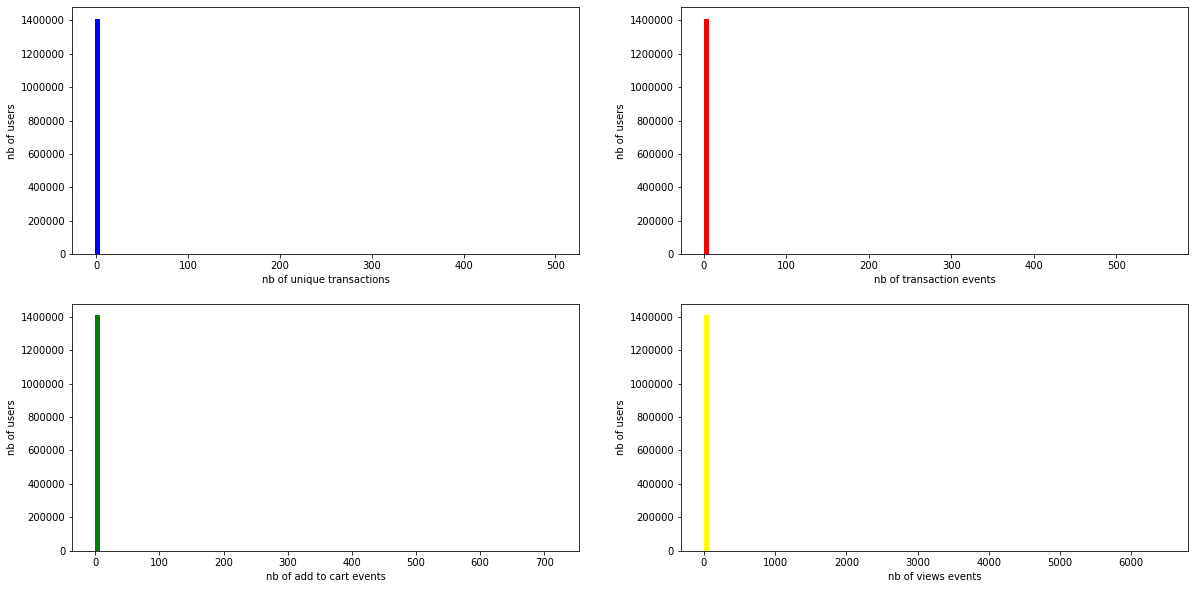

In [5]:
# Insérer le code ici

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
# transactions uniques
axes[0, 0].hist(df['nb_unique_transactions'], bins=100, color='blue')
axes[0, 0].set_xlabel('nb of unique transactions')
axes[0, 0].set_ylabel('nb of users')

# transactions 
axes[0, 1].hist(df['nb_transaction_events'], bins=100, color='red')
axes[0, 1].set_xlabel('nb of transaction events')
axes[0, 1].set_ylabel('nb of users')

# paniers
axes[1, 0].hist(df['nb_addtocart_events'], bins=100, color='green')
axes[1, 0].set_xlabel('nb of add to cart events')
axes[1, 0].set_ylabel('nb of users')

# vues
axes[1, 1].hist(df['nb_view_events'], bins=100, color='yellow')
axes[1, 1].set_xlabel('nb of views events')
axes[1, 1].set_ylabel('nb of users')

plt.show()

<blockquote>
On s'aperçoit très vite qu'on ne peut pas voir grand chose sur ces graphiques... Certains visiteurs ont en effet un nombre beaucoup trop important de transactions. Ces utilisateurs ne nous intéressent pas réellement: ils sont soit des utilisateurs très fréquents (robot par exemple ou client très fidèle), soit une erreur dans l'acquisition des données.
On va donc se passer de ces utilisateurs pour la suite du projet. Fixons la limite à 20 transactions (ce qui sur 4 mois est déjà assez important). 
</blockquote>

* enlever les utilisateurs qui ont plus de 20 achats achats de <code>df</code>
* retracer les graphes

In [6]:
# Insérer le code ici


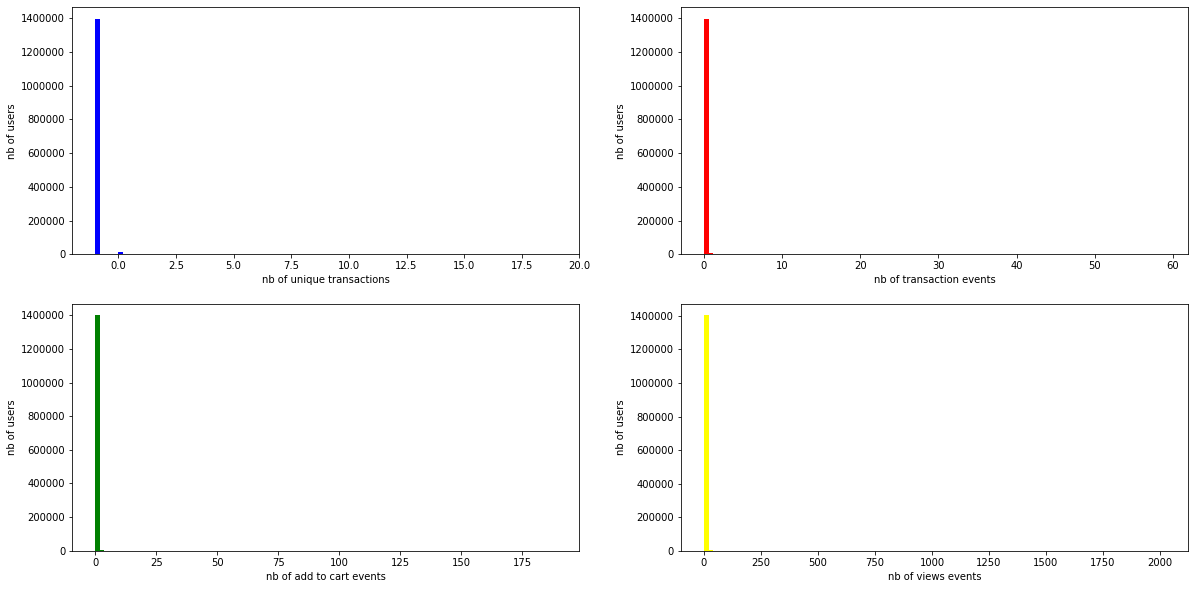

In [7]:
# Insérer le code ici

df = df[df['nb_unique_transactions'] <= 20]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
# transactions uniques
axes[0, 0].hist(df['nb_unique_transactions'], bins=100, color='blue')
axes[0, 0].set_xlabel('nb of unique transactions')
axes[0, 0].set_ylabel('nb of users')

# transactions 
axes[0, 1].hist(df['nb_transaction_events'], bins=100, color='red')
axes[0, 1].set_xlabel('nb of transaction events')
axes[0, 1].set_ylabel('nb of users')

# paniers
axes[1, 0].hist(df['nb_addtocart_events'], bins=100, color='green')
axes[1, 0].set_xlabel('nb of add to cart events')
axes[1, 0].set_ylabel('nb of users')

# vues
axes[1, 1].hist(df['nb_view_events'], bins=100, color='yellow')
axes[1, 1].set_xlabel('nb of views events')
axes[1, 1].set_ylabel('nb of users')

plt.show()

<blockquote>
    Ces graphiques nous montre quelque chose d'évident mais qui est intéressant de vérifier: il y a beaucoup plus de visiteurs qui voient un produit que de visiteurs qui les ajoutent à leur panier, et encore plus que de visiteurs qui achètent. Vérifions cette information avec un autre graphique:
    On va essayer de montrer la proportion de personnes concernées par chacun des événements:
</blockquote>

* construire un diagramme en barre contenant le nombre de visiteurs qui ont vus un produit, puis le nombre de visiteurs qui ont mis un produit dans leur panier et enfin le nombre de visiteurs qui ont acheté un produit.

In [7]:
# Insérer le code ici


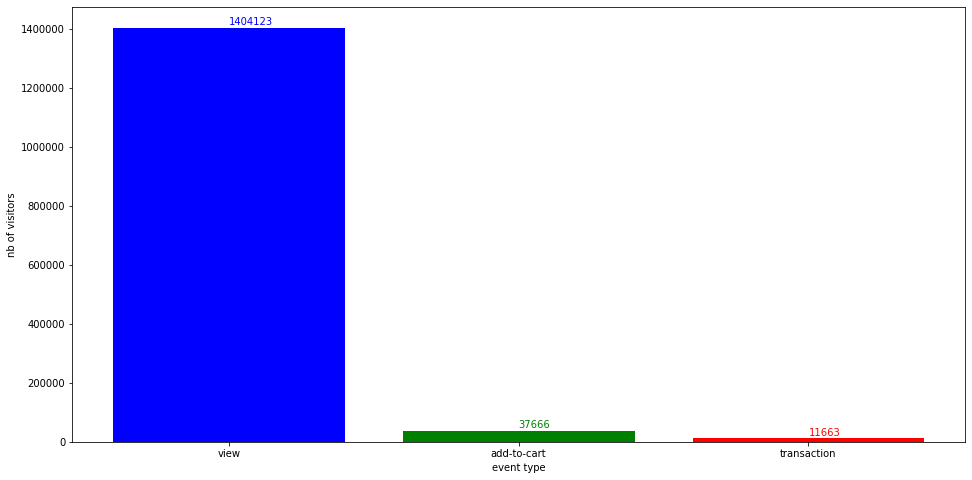

In [8]:
# Insérer le code ici

data = [
    (df['nb_view_events']>0).sum(), 
    (df['nb_addtocart_events']>0).sum(), 
    (df['nb_transaction_events']>0).sum()
]

colors = ['blue', 'green', 'red']

plt.figure(figsize=(16, 8))

plt.bar(x=[0, 1, 2], height=data, color=colors)

plt.xticks([0, 1, 2], ['view', 'add-to-cart', 'transaction'])
plt.ylabel('nb of visitors')
plt.xlabel('event type')

for i in range(3):
    plt.text(x=i, y=data[i] + 10000, s=data[i], color=colors[i])

plt.show()

<blockquote>
Ces informations sont déjà précieuses même si très grossières: en moyenne, si un visiteur voit un produit, on a une probabilité de 2,5% qu'ils l'ajoute à son panier et sur ceux-là seulement 30% finissent par acheter quelque chose. Évidemment le raisonnement est assez simpliste mais on obtient déjà un ordre d'idée de comportement des utilisateurs du site. On obtient ainsi une modélisation du <i>purchase funnel</i>. <br><br> Notons aussi que ces proportions impliquent que si nous réalisons un problème de classification dont l'achat est la cible, le jeu de données sera très fortement déséquilibré...
<br><br>
Il faut aussi que nous fassions en sorte que le choix que nous avons fait de prendre uniquement les visiteurs avec moins de 20 achats soit entériné pour la suite du projet: 
</blockquote>

* exécuter la cellule suivante:

In [9]:
# Exécuter cette cellule

df_total = pd.read_csv('events.csv') # chargeons les données totales
ids_of_the_users_kept = set(df.index) # gardons de côté les ids que l'on veut garder

print(df_total.shape)

df_light = df_total[df_total.visitorid.isin(ids_of_the_users_kept)] # on ne garde que ces lignes dans le dataset final

print(df_light.shape)

print(df_light.head())

df_light = df_light.reset_index(drop=True)  # on réinitialise l'index 

df_light.to_csv('events_light.csv', index=True)  # on sauvegarde le jeu de données allégé 
# et on garde le nouvel index pour avoir un identifiant unique pour chacun des événements

del df_total, df_light # removing those dataframes from memory

(2756101, 5)
(2687703, 5)
       timestamp  visitorid event  itemid  transactionid
0  1433221332117     257597  view  355908            NaN
1  1433224214164     992329  view  248676            NaN
2  1433221999827     111016  view  318965            NaN
3  1433221955914     483717  view  253185            NaN
4  1433221337106     951259  view  367447            NaN


<blockquote>
Essayons de comparer les variables maintenant: on veut voir comment se répartissent les vues par rapport aux ajouts au panier et on veut voir comment se répartissent les ajouts au panier vis-à-vis des achats.
    
    
</blockquote>

* construire un <code>scatter plot</code> pour chacun de ces couples de variables.

In [10]:
# Insérer le code ici


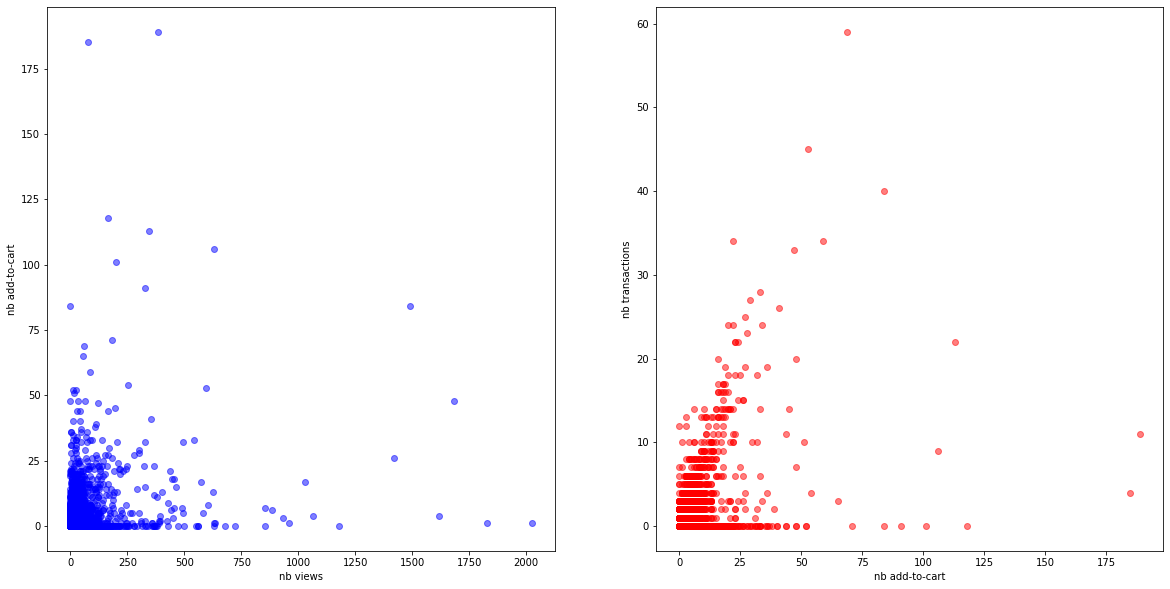

In [11]:
# Insérer le code ici

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))

# vues vs paniers
axes[0].scatter(df['nb_view_events'], df['nb_addtocart_events'], color='blue', alpha=.5)
axes[0].set_xlabel('nb views')
axes[0].set_ylabel('nb add-to-cart')


# paniers vs transactions
axes[1].scatter(df['nb_addtocart_events'], df['nb_transaction_events'], color='red', alpha=.5)
axes[1].set_xlabel('nb add-to-cart')
axes[1].set_ylabel('nb transactions')


plt.show()

<blockquote>
Ces graphiques ne nous apprennent pas beaucoup de choses mais on peut déjà entrevoir que les produits ne peuvent pas être ajoutés au panier sans avoir été vu. Par contre on peut ajouter le fait d'acheter plusieurs fois le même objet n'implique pas plusieurs ajouts au panier.<br>
Mais les données semblent trop tirées vers les valeurs faibles. Il est donc difficile d'obtenir plus d'informations.
</blockquote>

* on peut encore faire beaucoup d'analyses sur ce jeu de données.

In [1]:
# Insérer le code ici


In [1]:
# Insérer le code ici
